For the given data points, plot the lines of best fit for dimensionality reduction after applying LDA and PCA.


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [64]:
def LDA(X):

    mean_vectors = []
    Sw_classes = []
    for class_label in X['Label'].unique():

        #Go through each class and calculate the mean vectors
        class_i = X[X['Label'] ==  class_label]
        class_i = class_i.drop(columns=['Label'])
        mean_i = np.mean(class_i, axis = 0)
        mean_vectors.append(mean_i)
        #print(class_i, end = '\n')

        #Calculate the within class scatter matrix
        S_i = np.zeros((class_i.shape[1], class_i.shape[1]))
        S_i = np.dot((class_i - mean_i).T, (class_i - mean_i))
        Sw_classes.append(S_i)
    
    Sw_classes = np.array(Sw_classes)

    #Add the scatter matrices of each class.
    Sw = np.sum(Sw_classes, axis = 0)
    print("The within scatter matrix for the dataset is:\n", Sw)

    #Calculate the weights by the formula W = Sw^-1 * (mean_vector_1 - mean_vector_2)
    weights = np.dot(np.linalg.inv(Sw), (mean_vectors[0] - mean_vectors[1]))
    print("The weights for the LDA are:\n", weights)
    df_reduced = np.dot(X.drop(columns=['Label']), weights)
    df_reduced = pd.DataFrame(df_reduced)
    return df_reduced


In [65]:
df = pd.DataFrame([[1, 2, 0], [3, 5, 0], [4, 3, 0], [5, 6, 0], [7, 5, 0], [6, 2, 1], [9, 4, 1], [10, 1, 1], [12, 3, 1], [13, 6, 1]], columns = ['x', 'y', 'Label'])
print(df)

    x  y  Label
0   1  2      0
1   3  5      0
2   4  3      0
3   5  6      0
4   7  5      0
5   6  2      1
6   9  4      1
7  10  1      1
8  12  3      1
9  13  6      1


In [66]:
df_reduced = LDA(df)

df_reduced['Label'] = df['Label']
print(df_reduced)

The within scatter matrix for the dataset is:
 [[50.  22. ]
 [22.  25.6]]
The weights for the LDA are:
 [-0.22060302  0.22864322]
          0  Label
0  0.236683      0
1  0.481407      0
2 -0.196482      0
3  0.268844      0
4 -0.401005      0
5 -0.866332      1
6 -1.070854      1
7 -1.977387      1
8 -1.961307      1
9 -1.495980      1


In [67]:
# Function for Principal Component Analysis (PCA) which takes a DataFrame as input
def pca(X, k):
    
    # Making the data mean-centered
    mean = np.mean(X, axis=0)
    X = X - mean

    # Calculate the covariance matrix
    cov_matrix = np.cov(X, rowvar=False)

    # Calculate the eigenvalues and eigenvectors
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)

    eig_values, eig_vectors = eig_values.real, eig_vectors.real

    # Sort the eigenvectors by decreasing eigenvalues
    idx = np.argsort(eig_values)[::-1]

    # Sort eigenvalues
    eig_values = eig_values[idx]  

    print("Eigen values after sorting\n", eig_values)

    # Select the top d eigenvectors
    sel_eigen_vectors = eig_vectors[:, :1]

    # Project the data onto the selected eigenvectors
    X_pca = X @ sel_eigen_vectors

    return X_pca

In [68]:
df_pca = pca(df.drop(columns=['Label']), 1)
df_pca = pd.DataFrame(df_pca)
df_pca['Label'] = df['Label']
print(df_pca)

Eigen values after sorting
 [15.60402119  3.07375659]
          0  Label
0 -6.094112      0
1 -3.911407      0
2 -3.037727      0
3 -1.853086      0
4  0.080850      0
5 -1.103791      1
6  2.014786      1
7  2.826273      1
8  4.946786      1
9  6.131427      1


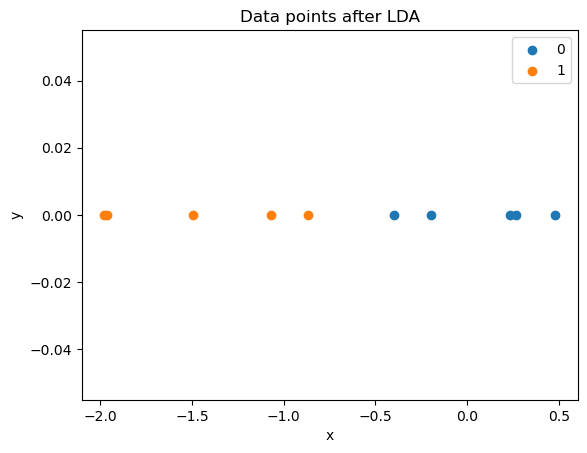

In [69]:
#plotting the data points after LDA
for label in df_reduced['Label'].unique():
    plt.scatter(df_reduced[df_reduced['Label'] == label][0], np.zeros(df_reduced[df_reduced['Label'] == label].shape[0]), label = label)
plt.title('Data points after LDA')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


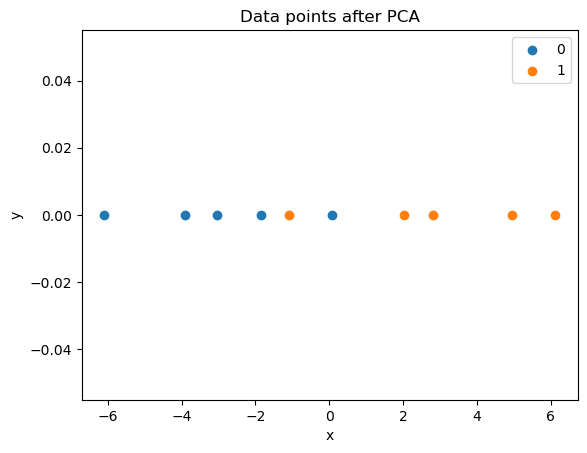

In [70]:
#Plotting data points for PCA
for label in df_pca['Label'].unique():
    plt.scatter(df_pca[df_pca['Label'] == label][0], np.zeros(df_pca[df_pca['Label'] == label].shape[0]), label = label)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points after PCA')
plt.legend()
plt.show()

2.Consider the 128- dimensional feature vectors (d=128) given in the “gender.csv” 

file. (2 classes, male and female)

a) Use LDA to reduce the dimension from d to d’. (Here d=128)

b) Choose the direction “W‟ to reduce the dimension d’ (select appropriate d’).

c) Use d’ features to classify the test cases (use any classification algorithm 

taught in class, Bayes classifier, minimum distance classifier, and so on).


Dataset Specifications:

Total number of samples = 800

Number of classes = 2 (labeled as “male” and “female”)

Samples from “1 to 400” belongs to class “male”

Samples from “401 to 800” belongs to class “female”

Number of samples per class = 400

Number of dimensions = 128

Use the following information to design classifier:

Number of test cases (first 10 in each class) = 20

Number of training feature vectors ( remaining 390 in each class) = 390

Number of reduced dimensions = d’ (map 128 to d’ features vector)


In [71]:
#Read the dataset.
gender_df = pd.read_csv('gender.csv')
gender_df.rename(columns = {'Unnamed: 1': 'Label'}, inplace = True)
gender_df.drop(columns = ['Unnamed: 0'], inplace = True)
gender_df

,Label,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [72]:
gender_lda = LDA(gender_df)

The within scatter matrix for the dataset is:
 [[ 2.2506239  -0.36724384  0.0211587  ...  0.32350867 -0.16354527
  -0.10639707]
 [-0.36724384  1.92093402  0.16345657 ... -0.32531367 -0.16256513
  -0.05737371]
 [ 0.0211587   0.16345657  1.76240414 ... -0.19711614 -0.03509416
   0.1269321 ]
 ...
 [ 0.32350867 -0.32531367 -0.19711614 ...  1.88580894 -0.01889887
   0.1052213 ]
 [-0.16354527 -0.16256513 -0.03509416 ... -0.01889887  1.91424641
  -0.01886765]
 [-0.10639707 -0.05737371  0.1269321  ...  0.1052213  -0.01886765
   1.76875313]]
The weights for the LDA are:
 [-3443.37337923 -4595.39978993  1837.36835003  4276.18540525
 -5654.72032785  2827.1959374  -6451.4172399  -1534.62683868
  1079.06778526  -760.88800144 -3427.73187065 -1057.44750595
 -3328.75864935 -5180.50234652  3874.99489236 -3404.98488045
 -4099.12542915  4382.52800584 -2444.31523085  4443.45418072
   871.48599243  2174.30807209  3225.16479015 -2800.96642876
  1473.73160839  2739.26178694   112.10899222  3320.84418297
  33

In [73]:
gender_lda

,0
0,0.070974
1,0.075027
2,0.067249
3,0.068477
4,0.069581
...,...
795,0.024116
796,0.011513
797,0.021516
798,0.014435


In [74]:
#as first 400 are male and next 400 are female
labels = np.array([0] * 400 + [1] * 400)

#Test dataset first 10 in each class
test_df = pd.concat([gender_lda[ : 10], gender_lda[400 : 410]])
test_labels = np.array([0] * 10 + [1] * 10)

#Remaining data is used for training
train_male = gender_lda.iloc[:390]       # First 390 samples belong to "male"

#Mean for the training data
mean_male = train_male.mean()

train_female = gender_lda.iloc[390:780]

#For female
mean_female = train_female.mean()

#Calculate the standard deviation for each class
std_male = train_male.std().values[0]
std_female = train_female.std().values[0]

pw1, pw2 = 0.5, 0.5

In [75]:

# Function to calculate the probability density function
def calculate_prob(x, mean, std):
    exponent = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

# Calculate the probability of each class
predictions = []
for x in test_df.values:
    prob_male = calculate_prob(x, mean_male.values[0], std_male) * pw1
    prob_female = calculate_prob(x, mean_female.values[0], std_female) * pw2
    predictions.append(0 if prob_male > prob_female else 1)

# Convert predictions to numpy array
predictions = np.array(predictions)

# Calculate accuracy
accuracy = np.mean(test_labels == predictions) * 100
print("Accuracy of the model is", accuracy, "%")

Accuracy of the model is 95.0 %


In [76]:
for i, (true, pred) in enumerate(zip(test_labels, predictions)):
    print(f"Sample {i+1}: True label = {'Male' if true == 0 else 'Female'}, Predicted = {'Male' if pred == 0 else 'Female'}")


Sample 1: True label = Male, Predicted = Male
Sample 2: True label = Male, Predicted = Male
Sample 3: True label = Male, Predicted = Male
Sample 4: True label = Male, Predicted = Male
Sample 5: True label = Male, Predicted = Male
Sample 6: True label = Male, Predicted = Male
Sample 7: True label = Male, Predicted = Male
Sample 8: True label = Male, Predicted = Male
Sample 9: True label = Male, Predicted = Male
Sample 10: True label = Male, Predicted = Male
Sample 11: True label = Female, Predicted = Male
Sample 12: True label = Female, Predicted = Female
Sample 13: True label = Female, Predicted = Female
Sample 14: True label = Female, Predicted = Female
Sample 15: True label = Female, Predicted = Female
Sample 16: True label = Female, Predicted = Female
Sample 17: True label = Female, Predicted = Female
Sample 18: True label = Female, Predicted = Female
Sample 19: True label = Female, Predicted = Female
Sample 20: True label = Female, Predicted = Female


Fisherfaces- Face classification using LDA (40 classes)

a) Use the following “face.csv” file to classify the faces of 40 different people using LDA.

b) Do not use the in-built function for implementing LDA.

c) Use appropriate classifier taught in class (use any classification algorithm taught in class like Bayes classifier, minimum distance classifier, and so on)

d) Refer to the following link for a description of the dataset: https://towardsdatascience.com/eigenfaces-face-classification-in-python-7b8d2af3d3ea


In [77]:
face_df = pd.read_csv('face.csv')
face_df.rename({'target': 'Label'}, axis = 1, inplace = True)

In [78]:
import numpy as np
import pandas as pd

def LDA_multiclass(X):

    #Find total mean
    total_mean = np.mean(X.drop(columns=['Label']), axis=0)

    classes = X['Label'].unique()
    Sw = np.zeros((X.shape[1] - 1, X.shape[1] - 1))  # (features, features)
    Sb = np.zeros((X.shape[1] - 1, X.shape[1] - 1))

    for class_label in classes:
        class_i = X[X['Label'] == class_label]
        class_i = class_i.drop(columns=['Label'])
        mean_i = np.mean(class_i, axis=0).values
        
        # Within-class scatter
        Sw_i = (class_i - mean_i).T @ (class_i - mean_i)
        Sw += Sw_i

        # Between-class scatter
        mean_diff = (mean_i - total_mean)
        mean_diff = np.array(mean_diff)
        mean_diff = mean_diff.reshape(-1, 1)
        Sb += (mean_diff @ mean_diff.T)

    #Find eigen vectors and eigen values
    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(Sw) @ Sb)
    eigvals, eigvecs = eigvals.real, eigvecs.real


    # Sort eigenvalues and select top n - 1 eigenvectors
    idx = eigvals.argsort()[::-1]
    eigvecs = eigvecs[:, idx]
    weights = eigvecs[:, :len(classes) - 1]
    print("The weights for the LDA are:\n", weights)

    # Projecting data onto new LDA space
    df_reduced = X.drop(columns=['Label']) @ weights
    return pd.DataFrame(df_reduced)

# Example usage
face_reduced = LDA_multiclass(face_df)


The weights for the LDA are:
 [[ 0.02421678  0.05055599  0.01075048 ... -0.03068211  0.0097415
  -0.03309377]
 [ 0.01327193  0.03131514  0.02697621 ... -0.01474673  0.00619009
  -0.02558758]
 [ 0.00460519  0.00358973  0.02736976 ...  0.00010447  0.00690308
  -0.02394577]
 ...
 [ 0.00429287  0.02459111  0.02014311 ... -0.01270796 -0.04402391
   0.02283476]
 [-0.0026432   0.01820529 -0.05083525 ... -0.00298159 -0.03374946
  -0.00455267]
 [-0.02447939 -0.02110352 -0.00169172 ...  0.01508498  0.00811592
  -0.01092153]]


In [79]:
face_reduced

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,4.213725,1.799428,-0.287967,-0.650485,-1.006593,-0.411635,-0.941690,-0.146558,-0.033369,0.051309,...,-0.017480,0.114154,-0.362449,-0.091496,0.093255,0.046075,-0.238326,0.175036,-0.028399,-0.084116
1,4.085591,1.748254,-0.303913,-0.452527,-0.944646,-0.516181,-0.929152,-0.228895,0.155577,0.210092,...,-0.047369,0.100243,-0.259421,-0.209169,-0.100891,-0.022422,-0.190501,0.328642,-0.256535,-0.074705
2,4.119848,1.806694,-0.252762,-0.572624,-1.016856,-0.449630,-0.889343,-0.027885,0.013565,0.097699,...,-0.210705,0.117787,-0.096411,-0.205707,0.002186,0.146400,-0.321190,0.408568,0.141519,-0.113635
3,4.139900,1.710063,-0.348830,-0.235725,-0.864513,-0.474675,-0.835443,-0.215442,0.064111,0.232973,...,-0.022114,-0.157923,-0.188837,-0.114539,0.242011,-0.069139,-0.119804,0.458819,0.017420,0.007335
4,4.339819,1.664040,-0.215584,-0.382952,-0.894456,-0.452178,-1.005460,-0.020431,0.132936,0.197306,...,0.002239,0.161236,-0.131250,-0.207181,0.053298,-0.206523,-0.203810,0.074536,-0.133055,-0.144703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4.731883,2.188341,-0.641544,-0.212540,-0.370135,-0.481774,-0.549977,-0.095101,0.164718,0.203085,...,-0.203274,-0.506288,-0.282987,-0.155647,0.431231,-0.005771,-0.102093,0.422699,-0.152237,0.320699
396,4.493201,2.097722,-0.703675,-0.253185,-0.279319,-0.350299,-0.766420,-0.131781,0.098811,0.369419,...,0.239451,-0.283566,-0.477303,-0.152620,0.608946,-0.065598,-0.182916,0.214692,-0.100399,0.057334
397,4.467560,2.221014,-0.555761,-0.137172,-0.256853,-0.423077,-0.517627,0.018091,0.085817,0.360749,...,0.076423,-0.623910,-0.387113,-0.107602,0.451684,0.070710,-0.213446,0.292766,-0.308665,0.146419
398,4.291835,2.142422,-0.510297,-0.349389,-0.401531,-0.583180,-0.555466,-0.052431,-0.069846,0.286361,...,0.137940,-0.567109,-0.342818,-0.267471,0.327643,0.210666,-0.177183,0.346824,0.059856,0.105111


In [80]:
X_train, X_test, y_train, y_test = train_test_split(face_reduced, face_df['Label'], test_size=0.2, random_state=42) 

In [81]:

# classify the testing data using Nearest Neighbor Classifier and print the accuracy 
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print("Accuracy of the model using Nearest Neighbor is: ", accuracy_score(y_test, pred)*100, "%")


Accuracy of the model using Nearest Neighbor is:  100.0 %
